In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"feedback_all/sents.txt", sep=".",header=None)
df = df.rename(columns={0 : 'Feedback'})
df.drop(1, axis=1, inplace=True)
df_sentiment = pd.read_csv(r"feedback_all/sentiments.txt",header=None)
df_topic = pd.read_csv(r"feedback_all/topics.txt",header=None)

In [2]:
sentiments_dict = {
    0:"negative",
    1:"neutral",
    2:"positive",
}
def update_sentiments(col):
    for i in range(len(col)):
        col[i] = sentiments_dict[col[i]]
    return col
update_sentiments(df_sentiment[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_16476\1933445714.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'positive' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  col[i] = sentiments_dict[col[i]]


0        positive
1        positive
2        negative
3        negative
4        positive
           ...   
16170    negative
16171    positive
16172    positive
16173    negative
16174     neutral
Name: 0, Length: 16175, dtype: object

In [3]:
topic_dict = {
    0:"Lecture",
    1:"Curriculum",
    2:"Facility",
    3:"Others",
}
def update_topic(col):
    for i in range(len(col)):
        col[i] = topic_dict[col[i]]
    return col

update_topic(df_topic[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_16476\1558802038.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Curriculum' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  col[i] = topic_dict[col[i]]


0        Curriculum
1           Lecture
2        Curriculum
3           Lecture
4           Lecture
            ...    
16170       Lecture
16171       Lecture
16172       Lecture
16173       Lecture
16174    Curriculum
Name: 0, Length: 16175, dtype: object

In [4]:
df['Sentiment'] = df_sentiment
df['Topic']=df_topic
df

,Feedback,Sentiment,Topic
0,slide giáo trình đầy đủ,positive,Curriculum
1,"nhiệt tình giảng dạy , gần gũi với sinh viên",positive,Lecture
2,đi học đầy đủ full điểm chuyên cần,negative,Curriculum
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,Lecture
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",positive,Lecture
...,...,...,...
16170,"các slide khó hiểu , ngôn ngữ trong slide phức...",negative,Lecture
16171,giáo viên giảng dạy có tâm huyết,positive,Lecture
16172,chia sẻ cho em nhiều điều hay,positive,Lecture
16173,em tiếp thu chậm,negative,Lecture


In [5]:
df.shape

(16175, 3)

In [6]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x281a5efa270>,
 [Text(0.13818451437175308, 1.0912859570194435, 'Negative'),
  Text(-1.09256404447847, 0.1276863685474983, 'Neutral'),
  Text(0.010575764564409389, -1.0999491593723223, 'Positive')],
 [Text(0.07537337147550167, 0.5952468856469691, '45.99%'),
  Text(-0.5959440242609837, 0.06964711011681725, '4.32%'),
  Text(0.005768598853314212, -0.5999722687485394, '49.69%')])

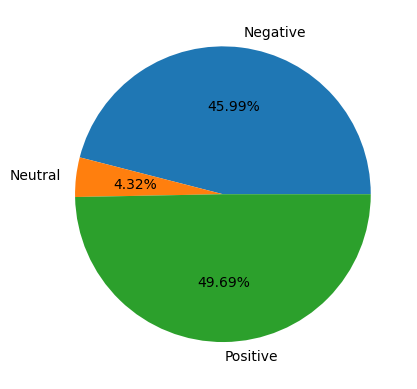

In [7]:
sentiments_plt = [df['Sentiment'].value_counts()['negative'], df['Sentiment'].value_counts()['neutral'], df['Sentiment'].value_counts()['positive']]
labels = ["Negative", "Neutral", "Positive"]

fig, ax = plt.subplots()
ax.pie(sentiments_plt, labels=labels, autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x281a82466f0>,
 [Text(-0.6947261776940937, 0.852851416148531, 'Lecture'),
  Text(0.41494877626125815, -1.0187332884908025, 'Curriculum'),
  Text(0.9879595170248174, -0.4836693009899323, 'Facility'),
  Text(1.086213813969133, -0.17360746050394696, 'Others')],
 [Text(-0.37894155146950564, 0.4651916815355623, '71.76%'),
  Text(0.22633569614250443, -0.5556727028131649, '18.79%'),
  Text(0.538887009286264, -0.2638196187217812, '4.40%'),
  Text(0.5924802621649816, -0.09469497845669833, '5.04%')])

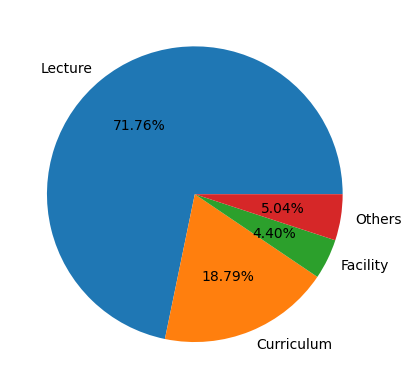

In [8]:
topic_plt= [df['Topic'].value_counts()['Lecture'], df['Topic'].value_counts()['Curriculum'], df['Topic'].value_counts()['Facility'], df['Topic'].value_counts()['Others']]
labels=['Lecture','Curriculum','Facility','Others']
fig, ax = plt.subplots()
ax.pie(topic_plt, labels=labels, autopct='%1.2f%%')

In [9]:
df['Sentiment'].value_counts()

Sentiment
positive    8038
negative    7439
neutral      698
Name: count, dtype: int64

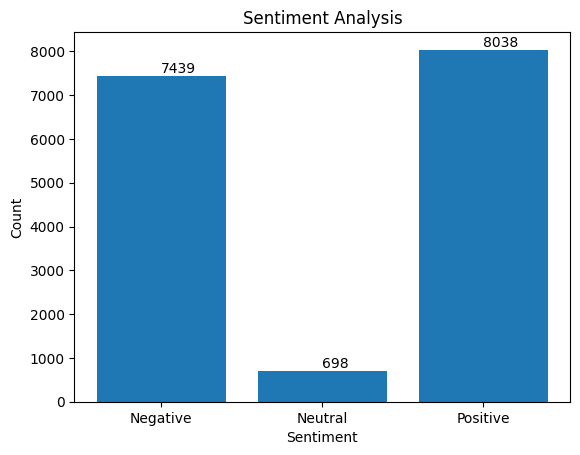

In [10]:
sentiments_plt = [df['Sentiment'].value_counts()['negative'], df['Sentiment'].value_counts()['neutral'], df['Sentiment'].value_counts()['positive']]
labels = ["Negative", "Neutral", "Positive"]

fig, ax = plt.subplots()
bars=ax.bar(labels, sentiments_plt)

ax.set_title('Sentiment Analysis')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()

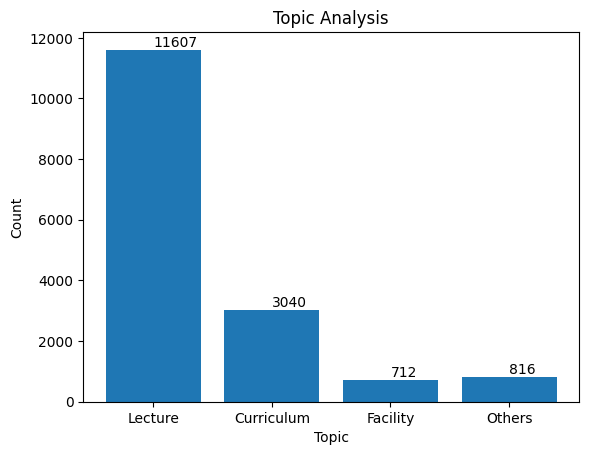

In [11]:
topic_plt= [df['Topic'].value_counts()['Lecture'], df['Topic'].value_counts()['Curriculum'], df['Topic'].value_counts()['Facility'], df['Topic'].value_counts()['Others']]
labels=['Lecture','Curriculum','Facility','Others']
fig, ax = plt.subplots()
bars=ax.bar(labels, topic_plt)

ax.set_title('Topic Analysis')
ax.set_xlabel('Topic')
ax.set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()